<a href="https://colab.research.google.com/github/Bogishc2112/titanic/blob/main/titanic_divine_judge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

In [3]:
df0 = pd.read_csv('/content/train.csv')
df0.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df0_test = pd.read_csv('/content/test.csv')
df0_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
display(df0.describe(),
df0.isnull().sum())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1 = df0.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
df1_test = df0_test.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)

In [7]:
df1.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [8]:
df2 = df1.drop(['Name'], axis=1)
df2_test = df1_test.drop(['Name'], axis=1)

In [9]:
class_one_fare = df2.Fare.loc[df2['Pclass'] == 1]
class_one_surv = df2.Survived.loc[df2['Pclass'] == 1]

class_two_fare = df2.Fare.loc[df2['Pclass'] == 2]
class_two_surv = df2.Survived.loc[df2['Pclass'] == 2]

class_three_fare = df2.Fare.loc[df2['Pclass'] == 3]
class_three_surv = df2.Survived.loc[df2['Pclass'] == 3]

print(class_one_fare.mean(),
class_one_surv.mean(),
class_two_fare.mean(),
class_two_surv.mean(),
class_three_fare.mean(),
class_three_surv.mean(), sep='\n')

84.15468749999992
0.6296296296296297
20.66218315217391
0.47282608695652173
13.675550101832997
0.24236252545824846


In [10]:
df3 = df2.drop(['Fare'], axis=1)
df3_test = df2_test.drop(['Fare'], axis=1)

In [11]:
embark_s_surv = df3.Survived.loc[df2['Embarked'] == 'S']
embark_q_surv = df3.Survived.loc[df2['Embarked'] == 'Q']
embark_c_surv = df3.Survived.loc[df2['Embarked'] == 'C']

print(embark_s_surv.mean(),
      embark_q_surv.mean(),
      embark_c_surv.mean(), sep='\n')

0.33695652173913043
0.38961038961038963
0.5535714285714286


In [12]:
df4 = df3
df4.insert(3, 'sex_male', 0)
df4_test = df3_test
df4_test.insert(2, 'sex_male', 0)

In [13]:
df4.sex_male.loc[df4['Sex'] == 'male'] = 1
df4_test.sex_male.loc[df4_test['Sex'] == 'male'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
df4.drop('Sex', axis=1)

,Survived,Pclass,sex_male,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,S
887,1,1,0,19.0,0,0,S
888,0,3,0,NaN,1,2,S
889,1,1,1,26.0,0,0,C


In [15]:
df4_test.drop('Sex', axis=1)

,Pclass,sex_male,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,Q
1,3,0,47.0,1,0,S
2,2,1,62.0,0,0,Q
3,3,1,27.0,0,0,S
4,3,0,22.0,1,1,S
...,...,...,...,...,...,...
413,3,1,NaN,0,0,S
414,1,0,39.0,0,0,C
415,3,1,38.5,0,0,S
416,3,1,NaN,0,0,S


In [16]:
df5 = df4
df5.insert(8, 'emb_s', 0)
df5.insert(9, 'emb_c', 0)
df5.insert(10, 'emb_q', 0)

df5_test = df4_test
df5_test.insert(7, 'emb_s', 0)
df5_test.insert(8, 'emb_c', 0)
df5_test.insert(9, 'emb_q', 0)

In [17]:
df5.emb_s.loc[df4['Embarked'] == 'S'] = 1
df5.emb_c.loc[df4['Embarked'] == 'C'] = 1
df5.emb_q.loc[df4['Embarked'] == 'Q'] = 1

df5_test.emb_s.loc[df4_test['Embarked'] == 'S'] = 1
df5_test.emb_c.loc[df4_test['Embarked'] == 'C'] = 1
df5_test.emb_q.loc[df4_test['Embarked'] == 'Q'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [18]:
df5 = df4.drop(['Embarked','Sex'], axis=1)
df5_test = df4_test.drop(['Embarked','Sex'], axis=1)

In [19]:
age_nan = df5.Survived.loc[df5.Age.isnull()]
print(age_nan.mean(),
df5.Survived.mean(),
df5.Survived.loc[df5['Age'] < 10].mean(),sep='\n')

0.2937853107344633
0.3838383838383838
0.6129032258064516


In [20]:
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff673a51dd8>,
      dtype=object)

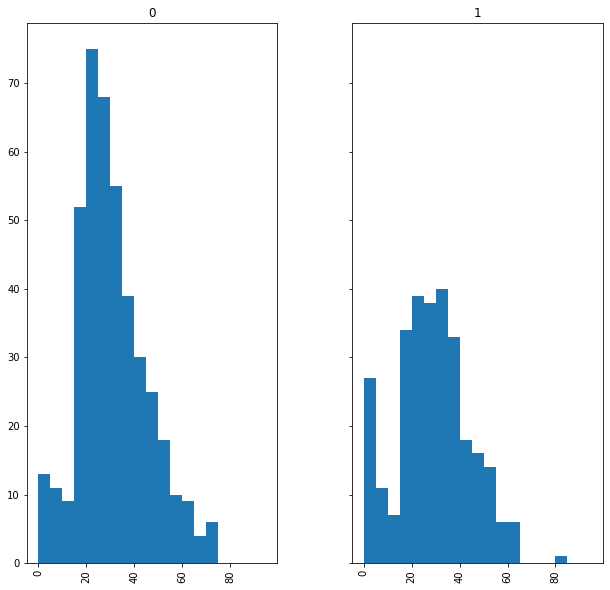

In [21]:
df5.hist(column='Age', bins=np.arange(0,100,5), figsize=(10,10), by='Survived', sharey=True, stacked=True)

In [22]:
df6 = df5
df6.insert(4, 'age_is_nan', 0)
df6_test = df5_test
df6_test.insert(3, 'age_is_nan', 0)

In [23]:
df6.age_is_nan.loc[df6['Age'].isnull()] = 1
df6_test.age_is_nan.loc[df6_test['Age'].isnull()] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [24]:
age_mean = df6.Age.mean()
df7 = df6.replace(np.nan, age_mean)
age_mean_test = df6.Age.mean()
df7_test = df6_test.replace(np.nan, age_mean_test)

In [25]:
df8 = df7.astype({'Age':'int64'})
df8_test = df7_test.astype({'Age':'int64'})

In [26]:
df8.dtypes

Survived      int64
Pclass        int64
sex_male      int64
Age           int64
age_is_nan    int64
SibSp         int64
Parch         int64
emb_s         int64
emb_c         int64
emb_q         int64
dtype: object

In [28]:
df8

,Survived,Pclass,sex_male,Age,age_is_nan,SibSp,Parch,emb_s,emb_c,emb_q
0,0,3,1,22,0,1,0,1,0,0
1,1,1,0,38,0,1,0,0,1,0
2,1,3,0,26,0,0,0,1,0,0
3,1,1,0,35,0,1,0,1,0,0
4,0,3,1,35,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,0,1,0,0
887,1,1,0,19,0,0,0,1,0,0
888,0,3,0,29,1,1,2,1,0,0
889,1,1,1,26,0,0,0,0,1,0


In [29]:
df8.describe()

,Survived,Pclass,sex_male,Age,age_is_nan,SibSp,Parch,emb_s,emb_c,emb_q
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.544332,0.198653,0.523008,0.381594,0.722783,0.188552,0.086420
std,0.486592,0.836071,0.477990,13.013778,0.399210,1.102743,0.806057,0.447876,0.391372,0.281141
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,1.000000,8.000000,6.000000,1.000000,1.000000,1.000000


In [30]:
df8.nunique()

Survived       2
Pclass         3
sex_male       2
Age           71
age_is_nan     2
SibSp          7
Parch          7
emb_s          2
emb_c          2
emb_q          2
dtype: int64

In [31]:
df_train = df8
df_test = df8_test

In [32]:
df_train1 = df_train.drop(['emb_s','emb_c','emb_q'], axis=1)
df_test1 = df_test.drop(['emb_s','emb_c','emb_q'], axis=1)

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

In [34]:
target = torch.tensor(df_train['Survived'])
df_tr = df_train1.drop(['Survived'], axis=1)
tr = torch.from_numpy(np.array(df_tr))

In [36]:
tr = tr.float()

In [37]:
target.shape
tr.shape

torch.Size([891, 6])

In [38]:
dataset = torch.utils.data.TensorDataset(tr, target)
trainset, valset = torch.utils.data.random_split(dataset, [668, 223])

In [39]:
test = torch.from_numpy(np.array(df_test1))

In [40]:
test = test.float()

In [41]:
test_target = torch.from_numpy(np.zeros(418))

In [42]:
testset = torch.utils.data.TensorDataset(test, test_target)

In [43]:
batch_size_train = 668
batch_size_val = 223
batch_size_test = 418

In [44]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size_val, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=False, num_workers=2)

In [46]:
class divine_judge(nn.Module):
    def __init__(self):
        super(divine_judge, self).__init__()
        self.fc1 = nn.Linear(6, 160)
        self.fc2 = nn.Linear(160, 1)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x
    
net = divine_judge()

In [47]:
params = list(net.parameters())
print(len(params))
for i in range(len(params)):
  print(params[i].size())

4
torch.Size([160, 6])
torch.Size([160])
torch.Size([1, 160])
torch.Size([1])


In [48]:
learning_rate = 0.01
epoch_count = 100

In [49]:
criterion = nn.BCEWithLogitsLoss()
criterion1 = nn.BCELoss()
criterion2 = nn.CrossEntropyLoss()
optimizer = optim.SGD(params, lr = learning_rate, momentum=0.9, nesterov=False)
optimizer1 = optim.Adam(params, lr = learning_rate, betas = (0.9,0.999), eps = 1e-6)

In [50]:
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    print(inputs.shape, labels.shape)
    outputs = net(inputs)
    print(outputs.shape)

torch.Size([668, 6]) torch.Size([668])
torch.Size([668, 1])


In [92]:
with torch.enable_grad():
    for epoch in range(epoch_count):
        start = time.time()
        print('epoch', epoch + 1)

        for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          optimizer1.zero_grad()
          outputs = net(inputs)
          outputs = torch.reshape(outputs, (-1,))
          labels = labels.type_as(outputs)
          loss = criterion1(outputs, labels)
          a = list(net.parameters())[0].clone()
          loss.backward()
          optimizer1.step()
          b = list(net.parameters())[0].clone()
          print(torch.equal(a.data, b.data))

        end = time.time()
        print('time spent on epoch %d: %.2f s' % (epoch + 1,end - start))
    print('sector clear! time spent: %.1f' % (end - start)) 


epoch 1
False
time spent on epoch 1: 0.06 s
epoch 2
False
time spent on epoch 2: 0.05 s
epoch 3
False
time spent on epoch 3: 0.05 s
epoch 4
False
time spent on epoch 4: 0.05 s
epoch 5
False
time spent on epoch 5: 0.05 s
epoch 6
False
time spent on epoch 6: 0.05 s
epoch 7
False
time spent on epoch 7: 0.05 s
epoch 8
False
time spent on epoch 8: 0.05 s
epoch 9
False
time spent on epoch 9: 0.05 s
epoch 10
False
time spent on epoch 10: 0.05 s
epoch 11
False
time spent on epoch 11: 0.05 s
epoch 12
False
time spent on epoch 12: 0.05 s
epoch 13
False
time spent on epoch 13: 0.05 s
epoch 14
False
time spent on epoch 14: 0.05 s
epoch 15
False
time spent on epoch 15: 0.05 s
epoch 16
False
time spent on epoch 16: 0.06 s
epoch 17
False
time spent on epoch 17: 0.05 s
epoch 18
False
time spent on epoch 18: 0.05 s
epoch 19
False
time spent on epoch 19: 0.05 s
epoch 20
False
time spent on epoch 20: 0.05 s
epoch 21
False
time spent on epoch 21: 0.05 s
epoch 22
False
time spent on epoch 22: 0.05 s
epoch 

In [52]:
print(net)

divine_judge(
  (fc1): Linear(in_features=6, out_features=160, bias=True)
  (fc2): Linear(in_features=160, out_features=1, bias=True)
)


In [ ]:
for param in net.parameters():
  print(param.data)

In [88]:
torch.save(net, '/contents')

In [89]:
net1 = torch.load('/contents')

In [91]:
correct_val = 0
total_val = 0
avg_val_acc = 0.0

with torch.no_grad():
    for data in valloader:
        dataframe, labels = data
        outputs = net(dataframe)
        outputs = torch.squeeze(torch.round(outputs))

        for i in range(len(outputs)):
          total_val +=1
          if outputs[i] == labels[i]:
            correct_val += 1

        avg_val_acc = 100 * correct_val / total_val

print('validation accuracy %.2f %%, error rate %.2f %%' % (avg_val_acc, 100 - avg_val_acc))

validation accuracy 78.92 %, error rate 21.08 %


In [98]:
predictions = torch.empty(0)
with torch.no_grad():
  for data in testloader:
    dataframe, labels = data
    outputs = net(dataframe)
    outputs = torch.squeeze(torch.round(outputs))
    predictions = torch.cat((predictions, outputs), 0)
print(len(predictions))
print(predictions)

418
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
        1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 

In [106]:
pred=pd.DataFrame(predictions).astype(int)
pred

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [108]:
gender = pd.read_csv('/content/gender_submission.csv')
gender['Survived'].values[:] = pred[0].values[:]

In [112]:
gender

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [114]:
gender.to_csv('predictions.csv', index = False)

In [115]:
from google.colab import files
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>